## Transcrire un algorithme (Grover)

### Registres

In [8]:
from qiskit import QuantumRegister, ClassicalRegister

valeurs = QuantumRegister(3, 'valeurs')
mesures = ClassicalRegister(valeurs.size, 'mesures')

### Oracle

In [9]:
from qiskit import QuantumCircuit

oracle = QuantumCircuit(valeurs.size)
oracle.barrier(range(oracle.num_qubits))
oracle.x(1)
oracle.ccz(0, 1, 2)
oracle.x(1)
oracle.barrier(range(oracle.num_qubits))
oracle.draw()

░               ░ 
q_0: ─░───────■───────░─
      ░ ┌───┐ │ ┌───┐ ░ 
q_1: ─░─┤ X ├─■─┤ X ├─░─
      ░ └───┘ │ └───┘ ░ 
q_2: ─░───────■───────░─
      ░               ░

### Diffuseur

In [10]:
diffuseur = QuantumCircuit(valeurs.size)
diffuseur.h(range(diffuseur.num_qubits))
diffuseur.x(range(diffuseur.num_qubits))
diffuseur.barrier(range(diffuseur.num_qubits-1))
diffuseur.h(diffuseur.num_qubits-1)
diffuseur.ccx(0, 1, 2)
diffuseur.h(diffuseur.num_qubits-1)
diffuseur.barrier(range(diffuseur.num_qubits-1))
diffuseur.x(range(diffuseur.num_qubits))
diffuseur.h(range(diffuseur.num_qubits))
diffuseur.draw()

┌───┐┌───┐  ░         ░  ┌───┐┌───┐
q_0: ┤ H ├┤ X ├──░────■────░──┤ X ├┤ H ├
     ├───┤├───┤  ░    │    ░  ├───┤├───┤
q_1: ┤ H ├┤ X ├──░────■────░──┤ X ├┤ H ├
     ├───┤├───┤┌───┐┌─┴─┐┌───┐├───┤├───┤
q_2: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘

### Circuit

#### Amorce
Portes d'Hadamard + Oracle

In [11]:
circuit = QuantumCircuit(valeurs)
circuit.h(range(circuit.num_qubits))
circuit = circuit.compose(oracle)
circuit.draw()

┌───┐ ░               ░ 
valeurs_0: ┤ H ├─░───────■───────░─
           ├───┤ ░ ┌───┐ │ ┌───┐ ░ 
valeurs_1: ┤ H ├─░─┤ X ├─■─┤ X ├─░─
           ├───┤ ░ └───┘ │ └───┘ ░ 
valeurs_2: ┤ H ├─░───────■───────░─
           └───┘ ░               ░

#### Vérification de l'oracle
Simulation partielle

In [12]:
# Qiskit v0.46.1
#  from qiskit import transpile, BasicAer

#  simulator = BasicAer.get_backend('statevector_simulator')
#  result = simulator.run(transpile(circuit, simulator), shots=256).result()
#  states = result.get_statevector(circuit)

# Qiskit v1.0.2
from qiskit.quantum_info import Statevector

states = Statevector(circuit)

Phases

In [13]:
from numpy import arctan2, degrees, round

[round(degrees(arctan2(state.imag, state.real))) for state in states]

[0.0, 0.0, 0.0, 0.0, -0.0, 180.0, -0.0, -0.0]

Graphique

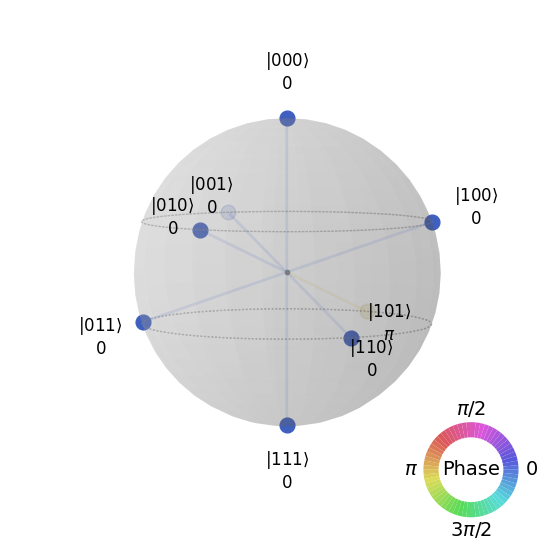

In [14]:
from qiskit.visualization import plot_state_qsphere

plot_state_qsphere(states, show_state_phases=True)

#### Ajout du diffuseur

In [15]:
circuit.compose(diffuseur, inplace=True)
circuit.draw()

┌───┐ ░               ░ ┌───┐┌───┐  ░         ░  ┌───┐┌───┐
valeurs_0: ┤ H ├─░───────■───────░─┤ H ├┤ X ├──░────■────░──┤ X ├┤ H ├
           ├───┤ ░ ┌───┐ │ ┌───┐ ░ ├───┤├───┤  ░    │    ░  ├───┤├───┤
valeurs_1: ┤ H ├─░─┤ X ├─■─┤ X ├─░─┤ H ├┤ X ├──░────■────░──┤ X ├┤ H ├
           ├───┤ ░ └───┘ │ └───┘ ░ ├───┤├───┤┌───┐┌─┴─┐┌───┐├───┤├───┤
valeurs_2: ┤ H ├─░───────■───────░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
           └───┘ ░               ░ └───┘└───┘└───┘└───┘└───┘└───┘└───┘

#### Répétition + Mesure

In [16]:
circuit = circuit \
    .compose(oracle) \
    .compose(diffuseur)

circuit.add_register(mesures)
circuit.measure_all(add_bits=False)
circuit.draw()

┌───┐ ░               ░ ┌───┐┌───┐  ░         ░  ┌───┐┌───┐ ░      »
valeurs_0: ┤ H ├─░───────■───────░─┤ H ├┤ X ├──░────■────░──┤ X ├┤ H ├─░──────»
           ├───┤ ░ ┌───┐ │ ┌───┐ ░ ├───┤├───┤  ░    │    ░  ├───┤├───┤ ░ ┌───┐»
valeurs_1: ┤ H ├─░─┤ X ├─■─┤ X ├─░─┤ H ├┤ X ├──░────■────░──┤ X ├┤ H ├─░─┤ X ├»
           ├───┤ ░ └───┘ │ └───┘ ░ ├───┤├───┤┌───┐┌─┴─┐┌───┐├───┤├───┤ ░ └───┘»
valeurs_2: ┤ H ├─░───────■───────░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░──────»
           └───┘ ░               ░ └───┘└───┘└───┘└───┘└───┘└───┘└───┘ ░      »
mesures: 3/═══════════════════════════════════════════════════════════════════»
                                                                              »
«                    ░ ┌───┐┌───┐  ░         ░  ┌───┐┌───┐ ░ ┌─┐      
«valeurs_0: ─■───────░─┤ H ├┤ X ├──░────■────░──┤ X ├┤ H ├─░─┤M├──────
«            │ ┌───┐ ░ ├───┤├───┤  ░    │    ░  ├───┤├───┤ ░ └╥┘┌─┐   
«valeurs_1: ─■─┤ X ├─░─┤ H ├┤ X ├──░────■────░──┤ X ├┤ H ├─░──╫─┤M├───
«            │ └───┘ ░ ├───┤├───┤┌───┐┌─┴─┐┌───┐├───┤├───┤ ░  ║ └╥┘┌─┐
«valeurs_2: ─■───────░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░──╫──╫─┤M├
«                    ░ └───┘└───┘└───┘└───┘└───┘└───┘└───┘ ░  ║  ║ └╥┘
«mesures: 3/══════════════════════════════════════════════════╩══╩══╩═
«                                                             0  1  2

### Simulation

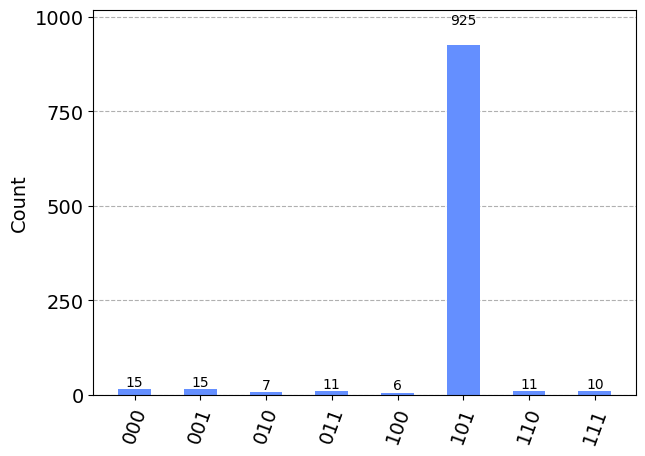

In [17]:
# Qiskit v0.46.1
#  from qiskit import transpile, BasicAer
#  simulator = BasicAer.get_backend('qasm_simulator')

# Qiskit v1.0.2
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit.providers.basic_provider import BasicProvider

simulator = BasicProvider().get_backend('basic_simulator')
compiled = transpile(circuit, simulator)
job = simulator.run(compiled, shots=1000)

plot_histogram(job.result().get_counts(compiled))

## Exécuter sur un ordinateur quantique

#### Connexion

In [ ]:
# Si nécessaire
%pip install qiskit-ibm-runtime

In [23]:
from qiskit_ibm_runtime import QiskitRuntimeService
from getpass import getpass

QiskitRuntimeService.save_account(
  channel="ibm_quantum", 
  token=getpass('IBM token : '),
  overwrite=True
)

#### Envoi sur IBM Quantum

In [26]:
from qiskit_ibm_runtime import Session, Sampler

nom_backend="ibm_lagos"
service = QiskitRuntimeService(channel="ibm_quantum")
with Session(service, backend=nom_backend) as session:
    job = Sampler(session=session).run(
        transpile(circuit, service.backend(nom_backend)), 
        shots=1024
    )
    print(f"{job.job_id()} ({job.status()})")

#### Affichage des résultats

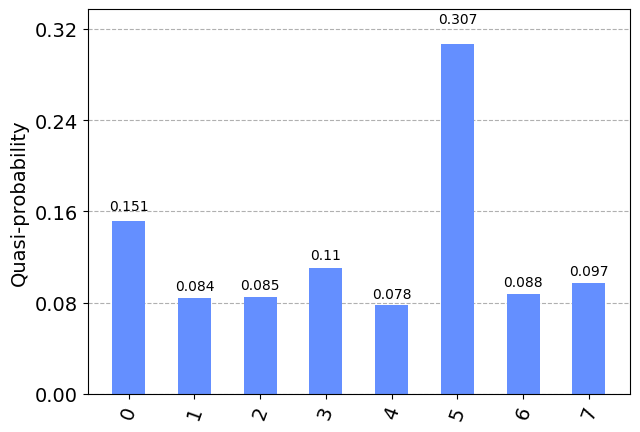

In [27]:
plot_histogram(job.result().quasi_dists)